## Makine Öğrenmesi ile Maaş Tahmini

### İş Problemi

Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol
oyuncularının maaş tahminleri için bir makine öğrenmesi modeli geliştiriniz.

### Veri Seti Hikayesi

Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan
StatLib kütüphanesinden alınmıştır. Veri seti 1988 ASA Grafik Bölümü
Poster Oturumu'nda kullanılan verilerin bir parçasıdır. Maaş verileri
orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır. 1986 ve
kariyer istatistikleri, Collier Books, Macmillan Publishing Company,
New York tarafından yayınlanan 1987 Beyzbol Ansiklopedisi
Güncellemesinden elde edilmiştir.

### Değişkenler

<table><tbody><tr><td>AtBat </td><td>1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı</td></tr><tr><td>Hits </td><td>1986-1987 sezonundaki isabet sayısı</td></tr><tr><td>HmRun </td><td>1986-1987 sezonundaki en değerli vuruş sayısı</td></tr><tr><td>Runs</td><td> 1986-1987 sezonunda takımına kazandırdığı sayı</td></tr><tr><td>RBI </td><td>Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı</td></tr><tr><td>Walks </td><td>Karşı oyuncuya yaptırılan hata sayısı</td></tr><tr><td>Years</td><td> Oyuncunun major liginde oynama süresi (sene)</td></tr><tr><td>CAtBat</td><td> Oyuncunun kariyeri boyunca topa vurma sayısı</td></tr><tr><td>CHits</td><td> Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı</td></tr><tr><td>CHmRun</td><td> Oyucunun kariyeri boyunca yaptığı en değerli sayısı</td></tr><tr><td>CRuns</td><td> Oyuncunun kariyeri boyunca takımına kazandırdığı sayı</td></tr><tr><td>CRBI</td><td> Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı</td></tr><tr><td>CWalks </td><td>Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı</td></tr><tr><td>League</td><td> Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör</td></tr><tr><td>Division </td><td>1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör</td></tr><tr><td>PutOuts </td><td>Oyun icinde takım arkadaşınla yardımlaşma</td></tr><tr><td>Assits </td><td>1986-1987 sezonunda oyuncunun yaptığı asist sayısı</td></tr><tr><td>Errors </td><td>1986-1987 sezonundaki oyuncunun hata sayısı</td></tr><tr><td>Salary</td><td> Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden)</td></tr><tr><td>NewLeague</td><td>1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör</td></tr></tbody></table>

<b>Değişken Sayısı: </b> 20

<b>Gözlem Sayısı: </b> 322

<b>Dosya Boyutu: </b> 21KB

### Görev

- Veri ön işleme,
- Özellik mühendisliği

işlemleri gerçekleştirerek maaş tahmin modeli geliştiriniz.



In [1]:
import warnings
import pandas as pd
import missingno as msno
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler

from data_prep import *
from eda import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Tum Base Modeller
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# Veri setinin okutulmasi
df = pd.read_csv("hitters.csv")
# İlk 5 satırı görüntüle
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [3]:
#### EDA ANALİZİ ####
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.000,380.929,153.405,16.000,255.250,379.500,512.000,687.000
Hits,322.000,101.025,46.455,1.000,64.000,96.000,137.000,238.000
HmRun,322.000,10.770,8.709,0.000,4.000,8.000,16.000,40.000
Runs,322.000,50.910,26.024,0.000,30.250,48.000,69.000,130.000
RBI,322.000,48.028,26.167,0.000,28.000,44.000,64.750,121.000
Walks,322.000,38.742,21.639,0.000,22.000,35.000,53.000,105.000
Years,322.000,7.444,4.926,1.000,4.000,6.000,11.000,24.000
CAtBat,322.000,2648.683,2324.206,19.000,816.750,1928.000,3924.250,14053.000
CHits,322.000,717.571,654.473,4.000,209.000,508.000,1059.250,4256.000
CHmRun,322.000,69.491,86.266,0.000,14.000,37.500,90.000,548.000


In [4]:
# Genel bilgilerini görelim.
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        

In [5]:
# Bağımlı değişkende 59 tane NA var!
# CAtBat, CHits outlier olabilir.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Maaş istatistiksel analiz
df["Salary"].describe()

count    263.000
mean     535.926
std      451.119
min       67.500
25%      190.000
50%      425.000
75%      750.000
max     2460.000
Name: Salary, dtype: float64

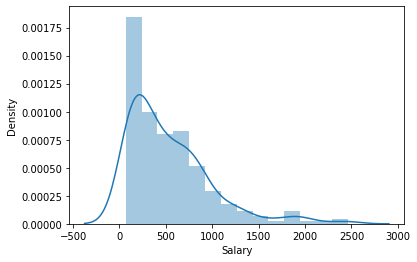

In [8]:
# Histograma benzer distplot gragiği çizdirelim.
sns.distplot(df.Salary)
plt.show()

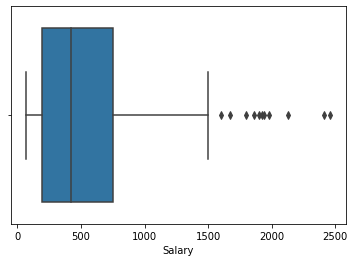

In [9]:
# Maaş için boxplot gragiği çizdirelim.
sns.boxplot(df.Salary)
plt.show()

In [10]:
# KATEGORİK VE NUMERİK DEĞİŞKENLERİN SEÇİLMESİ
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [11]:
cat_cols

['League', 'Division', 'NewLeague']

In [12]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [13]:
cat_but_car

[]

In [14]:
# KATEGORİK DEĞİŞKEN ANALİZİ

rare_analyser(df, "Salary", cat_cols)

League : 2
   COUNT  RATIO  TARGET_MEAN
A    175  0.543      542.000
N    147  0.457      529.118


Division : 2
   COUNT  RATIO  TARGET_MEAN
E    157  0.488      624.271
W    165  0.512      450.877


NewLeague : 2
   COUNT  RATIO  TARGET_MEAN
A    176  0.547      537.113
N    146  0.453      534.554




In [15]:
# SAYISAL DEĞİŞKEN ANALİZİ

for col in num_cols:
    num_summary(df, col, plot=False)

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64

count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64

count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64

count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20

In [16]:
# AYKIRI GÖZLEM ANALİZİ
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.1, q3=0.9))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


(322, 20)
(308, 20)


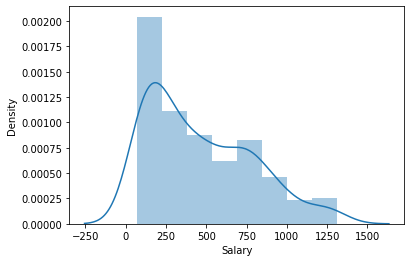

In [17]:
# 1300 den sonraki değerleri veri setinden çıkartıyorum.
# Çünkü boxplot grafiğine baktığımız zaman 1300'den sonraki değerlerde aykırılıklar görüyoruz.

print(df.shape)
df = df[(df['Salary'] < 1350) | (df['Salary'].isnull())]  # Eksik değerleri de istiyoruz.

print(df.shape)
sns.distplot(df.Salary)
plt.show()

In [18]:
#AYKIRI DEĞERLERİ BASKILAMA
for col in num_cols:
    if check_outlier(df, col, q1=0.05, q3=0.95):
        replace_with_thresholds(df, col, q1=0.05, q3=0.95)

In [19]:
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.05, q3=0.95))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [20]:
# EKSİK GÖZLEM ANALİZİ

In [21]:
missing_values_table(df)

        n_miss  ratio
Salary      59 19.160


In [22]:
# Salary bağımlı değişkeninde 59 Eksik Gözlem bulunmakta. Bunları çıkartmak bir çözüm yolu olabilir.

In [23]:
# KORELASYON ANALİZİ

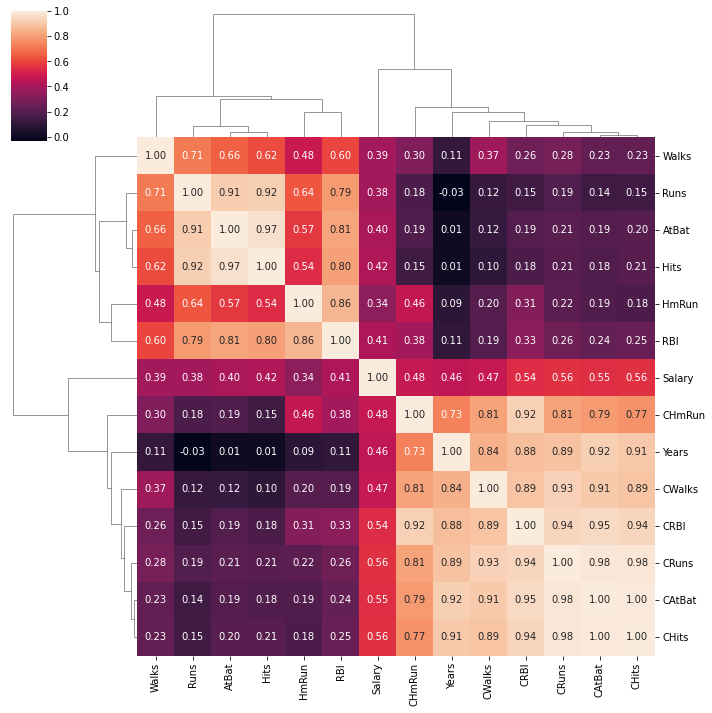

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'Salary']

In [24]:
import numpy as np

target_correlation_matrix(df, corr_th=0.3, target="Salary")

In [25]:
high_correlated_cols(df, plot=False, corr_th=0.90)

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [26]:
############################################
# VERİ ÖNİŞLEME
############################################

df['NEW_HitRatio'] = df['Hits'] / df['AtBat']
df['NEW_RunRatio'] = df['HmRun'] / df['Runs']
df['NEW_CHitRatio'] = df['CHits'] / df['CAtBat']
df['NEW_CRunRatio'] = df['CHmRun'] / df['CRuns']

df['NEW_Avg_AtBat'] = df['CAtBat'] / df['Years']
df['NEW_Avg_Hits'] = df['CHits'] / df['Years']
df['NEW_Avg_HmRun'] = df['CHmRun'] / df['Years']
df['NEW_Avg_Runs'] = df['CRuns'] / df['Years']
df['NEW_Avg_RBI'] = df['CRBI'] / df['Years']
df['NEW_Avg_Walks'] = df['CWalks'] / df['Years']

In [27]:
# Paydaya sıfır gelme ihtimaline karşılık paydadaki değişkenlere 1 eklenebilir.

In [28]:
# One Hot Encoder

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [29]:
# ARA

############################################
# MODELLEME
############################################

df_null = df[df["Salary"].isnull()]  # Salary içerisindeki boş değerleri ayıralım.
df.dropna(inplace=True)  # Salarydeki eksik değerleri çıkartma

y = df['Salary']
X = df.drop("Salary", axis=1)

In [30]:
##########################
# HOLD OUT - MODEL VALIDATION
##########################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
##########################
# # ROBUST SCALER:
# ALL DATA FINAL RMSE: 219.83899058361285
##########################

# cols = X.columns
# index = X.index
# from sklearn.preprocessing import RobustScaler
# transformer = RobustScaler().fit(X)
# X = transformer.transform(X)
# X = pd.DataFrame(X, columns=cols, index=index)

##########################
# # STANDARD SCALER:
# ALL DATA FINAL RMSE: 186.16240421879607
##########################

# num_cols.remove("Salary")
# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

In [32]:
##########################
# BASE MODELS
##########################

def all_models(X, y, test_size=0.2, random_state=12345, classification=True):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
        roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, mean_squared_error

    # Tum Base Modeller (Classification)
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from catboost import CatBoostClassifier
    from lightgbm import LGBMClassifier
    from sklearn.svm import SVC

    # Tum Base Modeller (Regression)
    from catboost import CatBoostRegressor
    from lightgbm import LGBMRegressor
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from xgboost import XGBRegressor

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)
    all_models = []

    if classification:
        models = [('LR', LogisticRegression(random_state=random_state)),
                  ('KNN', KNeighborsClassifier()),
                  ('CART', DecisionTreeClassifier(random_state=random_state)),
                  ('RF', RandomForestClassifier(random_state=random_state)),
                  ('SVM', SVC(gamma='auto', random_state=random_state)),
                  ('XGB', GradientBoostingClassifier(random_state=random_state)),
                  ("LightGBM", LGBMClassifier(random_state=random_state)),
                  ("CatBoost", CatBoostClassifier(verbose=False, random_state=random_state))]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            acc_train = accuracy_score(y_train, y_pred_train)
            acc_test = accuracy_score(y_test, y_pred_test)
            values = dict(name=name, acc_train=acc_train, acc_test=acc_test)
            all_models.append(values)

        sort_method = False
    else:
        models = [('LR', LinearRegression()),
                  ("Ridge", Ridge()),
                  ("Lasso", Lasso()),
                  ("ElasticNet", ElasticNet()),
                  ('KNN', KNeighborsRegressor()),
                  ('CART', DecisionTreeRegressor()),
                  ('RF', RandomForestRegressor()),
                  ('SVR', SVR()),
                  ('GBM', GradientBoostingRegressor()),
                  ("XGBoost", XGBRegressor()),
                  ("LightGBM", LGBMRegressor()),
                  ("CatBoost", CatBoostRegressor(verbose=False))]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred_test = model.predict(X_test)
            y_pred_train = model.predict(X_train)
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            values = dict(name=name, RMSE_TRAIN=rmse_train, RMSE_TEST=rmse_test)
            all_models.append(values)

        sort_method = True
    all_models_df = pd.DataFrame(all_models)
    all_models_df = all_models_df.sort_values(all_models_df.columns[2], ascending=sort_method)
    print(all_models_df)
    return all_models_df

In [33]:
all_models = all_models(X, y, test_size=0.2, random_state=46, classification=False)


          name  RMSE_TRAIN  RMSE_TEST
11    CatBoost       4.970    237.712
9      XGBoost       0.001    256.239
10    LightGBM      51.394    259.164
6           RF      63.601    260.267
8          GBM      30.648    261.812
4          KNN     167.550    268.997
5         CART       0.000    281.132
3   ElasticNet     202.308    328.042
2        Lasso     200.520    332.650
1        Ridge     199.917    333.875
7          SVR     315.167    336.098
0           LR     198.591    336.352


In [34]:
##########################
# RANDOM FORESTS MODEL TUNING
##########################

# Tuning için hazırlanan parametreler. Tuning zaman aldığı için çıkan parametre değerlerini girdim.
rf_params = {"max_depth": [4, 5, 7, 10],
             "max_features": [4, 5, 6, 8, 10, 12],
             "n_estimators": [80, 100, 150, 250, 400, 500],
             "min_samples_split": [8, 10, 12, 15]}

In [35]:
# rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1).fit(X_train , y_train)
# rf_cv_model.best_params_

best_params = {'max_depth': 10,
               'max_features': 8,
               'min_samples_split': 10,
               'n_estimators': 80}


In [36]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)


In [37]:
# RANDOM FORESTS TUNED MODEL
rf_tuned = RandomForestRegressor(max_depth=10, max_features=4, n_estimators=150,
                                 min_samples_split=8, random_state=42).fit(X_train, y_train)


In [38]:
# TUNED MODEL TRAIN HATASI
y_pred = rf_tuned.predict(X_train)

In [39]:
print("RF Tuned Model Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred)))

RF Tuned Model Train RMSE: 99.69754579820678


In [40]:
##########################
# TUNED MODEL TEST HATASI
##########################
y_pred = rf_tuned.predict(X_test)
print("RF Tuned Model Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RF Tuned Model Test RMSE: 155.72263111886258


In [41]:
#######################################
# FEATURE IMPORTANCE
#######################################

def plot_importance(model, features, num=len(X), save=False):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

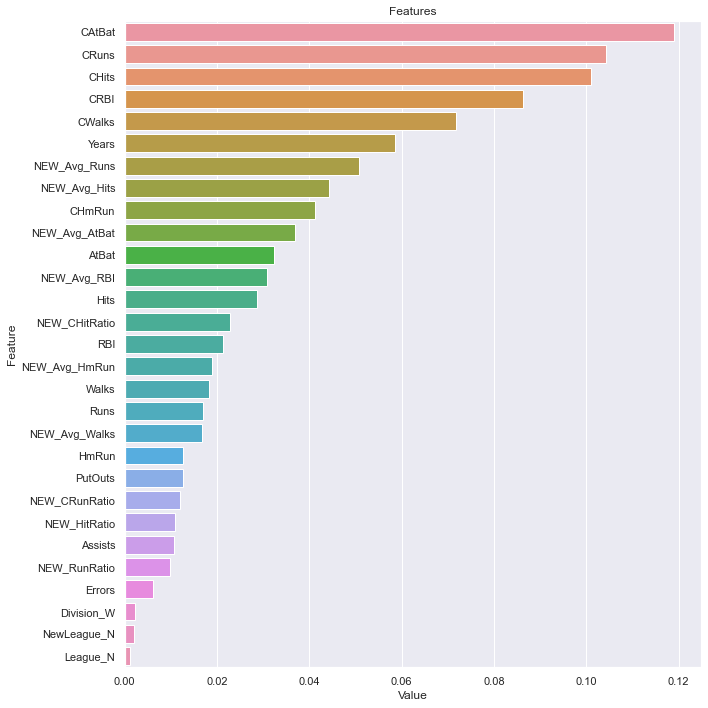

In [42]:
plot_importance(rf_tuned, X_train)

In [43]:
# Tuned edilmiş model nesnesinin kaydedilmesi
import pickle
pickle.dump(rf_tuned, open("rf_final_model.pkl", 'wb'))

In [44]:
# Tuned edilmiş model nesnesinin yüklenmesi
df_prep = pickle.load(open('rf_final_model.pkl', 'rb'))